In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from sklearn.model_selection import train_test_split
import string
from string import digits
import re

import pickle as pkl
import numpy as np
import pandas as pd


In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/MINI PROJECT/MOLD_train.tsv', sep='\t')
df1

,id,tweet,subtask_a,subtask_b,subtask_c
0,0,आजच्या जनता दरबारात जळगाव जिल्ह्यातील चाळीसगाव...,NOT,NaN,NaN
1,1,कुणी कविता करत असतं तर कुणी कविता जगत असतं कुण...,NOT,NaN,NaN
2,2,आम्हाला इतिहासातील औरंगजेबशी काही घेणे नाही आम...,NOT,NaN,NaN
3,3,गँभीर प्रकरण महाराष्ट्राची अवस्था बिकट आहे भाष...,NOT,NaN,NaN
4,4,कब्झा हा कन्नड चित्रपट लवकरच मराठी मध्ये डब्ब ...,NOT,NaN,NaN
...,...,...,...,...,...
3098,3098,@USER सगळ्यात जास्त वास मारणारी पुच्ची,OFF,UNT,NaN
3099,3099,@USER दोन नंबर पुच्ची पाकळ्या मस्त आहेत चाटायल...,OFF,TIN,OTH
3100,3100,@USER पुच्ची कप्तान साब,OFF,TIN,OTH
3101,3101,@USER नंबरकाळी पुच्ची आणि वर थोडे केसखालून चाट...,OFF,TIN,OTH


In [ ]:
df1.columns

Index(['id', 'tweet', 'subtask_a', 'subtask_b', 'subtask_c'], dtype='object')

In [ ]:
#df.corr()

In [ ]:
df1=df1.fillna("NOT")
df1

,id,tweet,subtask_a,subtask_b,subtask_c
0,0,आजच्या जनता दरबारात जळगाव जिल्ह्यातील चाळीसगाव...,NOT,NOT,NOT
1,1,कुणी कविता करत असतं तर कुणी कविता जगत असतं कुण...,NOT,NOT,NOT
2,2,आम्हाला इतिहासातील औरंगजेबशी काही घेणे नाही आम...,NOT,NOT,NOT
3,3,गँभीर प्रकरण महाराष्ट्राची अवस्था बिकट आहे भाष...,NOT,NOT,NOT
4,4,कब्झा हा कन्नड चित्रपट लवकरच मराठी मध्ये डब्ब ...,NOT,NOT,NOT
...,...,...,...,...,...
3098,3098,@USER सगळ्यात जास्त वास मारणारी पुच्ची,OFF,UNT,NOT
3099,3099,@USER दोन नंबर पुच्ची पाकळ्या मस्त आहेत चाटायल...,OFF,TIN,OTH
3100,3100,@USER पुच्ची कप्तान साब,OFF,TIN,OTH
3101,3101,@USER नंबरकाळी पुच्ची आणि वर थोडे केसखालून चाट...,OFF,TIN,OTH


In [ ]:
df1.iloc[[1981]]

,id,tweet,subtask_a,subtask_b,subtask_c
1981,1981,अहो मग आता जेव्हा कंगना नि इतका काही बोलली मुं...,OFF,NOT,NOT


In [ ]:
df1=df1.drop(df1.index[1981])
df1

,id,tweet,subtask_a,subtask_b,subtask_c
0,0,आजच्या जनता दरबारात जळगाव जिल्ह्यातील चाळीसगाव...,NOT,NOT,NOT
1,1,कुणी कविता करत असतं तर कुणी कविता जगत असतं कुण...,NOT,NOT,NOT
2,2,आम्हाला इतिहासातील औरंगजेबशी काही घेणे नाही आम...,NOT,NOT,NOT
3,3,गँभीर प्रकरण महाराष्ट्राची अवस्था बिकट आहे भाष...,NOT,NOT,NOT
4,4,कब्झा हा कन्नड चित्रपट लवकरच मराठी मध्ये डब्ब ...,NOT,NOT,NOT
...,...,...,...,...,...
3098,3098,@USER सगळ्यात जास्त वास मारणारी पुच्ची,OFF,UNT,NOT
3099,3099,@USER दोन नंबर पुच्ची पाकळ्या मस्त आहेत चाटायल...,OFF,TIN,OTH
3100,3100,@USER पुच्ची कप्तान साब,OFF,TIN,OTH
3101,3101,@USER नंबरकाळी पुच्ची आणि वर थोडे केसखालून चाट...,OFF,TIN,OTH


In [ ]:
df1[(df1['subtask_a']=="OFF") & (df1['subtask_b']=="UNT")]

,id,tweet,subtask_a,subtask_b,subtask_c
1982,1982,उद्धव ठाकरे यांना एकेरी संबोधलं म्हणून हक्कभंग...,OFF,UNT,NOT
1983,1983,च्यायला म्हणजे दुबईचा फोन ही पुडीच निघाली की,OFF,UNT,NOT
1984,1984,ह्या असल्या दळभद्री लोकांना अक्कल शिकवायला हवी...,OFF,UNT,NOT
1985,1985,बावळट कुठले काहीही तर्क लावतेत की डाळ,OFF,UNT,NOT
1986,1986,तिने तोंड उघडलं ह्यांनी नाक दाबायला सुरुवात केली,OFF,UNT,NOT
...,...,...,...,...,...
3032,3032,चायला हा मराठीत कधी पासून ट्विट करायला लागला ?...,OFF,UNT,NOT
3059,3059,मदत तातडीने द्यायला हवी महिने अधिकारी गोट्या ख...,OFF,UNT,NOT
3060,3060,@USER @USER @USER @USER @USER रंगा बिल्ला ने श...,OFF,UNT,NOT
3066,3066,@USER काही लोकं अजूनही म्हणतात की पूर आल्यावर ...,OFF,UNT,NOT


In [ ]:
df1[(df1['subtask_a']==df1['subtask_b'])]

,id,tweet,subtask_a,subtask_b,subtask_c
0,0,आजच्या जनता दरबारात जळगाव जिल्ह्यातील चाळीसगाव...,NOT,NOT,NOT
1,1,कुणी कविता करत असतं तर कुणी कविता जगत असतं कुण...,NOT,NOT,NOT
2,2,आम्हाला इतिहासातील औरंगजेबशी काही घेणे नाही आम...,NOT,NOT,NOT
3,3,गँभीर प्रकरण महाराष्ट्राची अवस्था बिकट आहे भाष...,NOT,NOT,NOT
4,4,कब्झा हा कन्नड चित्रपट लवकरच मराठी मध्ये डब्ब ...,NOT,NOT,NOT
...,...,...,...,...,...
3093,3093,@USER कितीही काही झाले तरी ही माझा पहिला सुपर ...,NOT,NOT,NOT
3094,3094,@USER @USER झकास शिवानी,NOT,NOT,NOT
3095,3095,@USER डिश मात्र झकास आहेएकदम मिसळ हाऊस वाला फिल,NOT,NOT,NOT
3096,3096,जांभूळ पाडा म्हणजे खवय्येगिरी करण्यासाठी एकदम ...,NOT,NOT,NOT


In [ ]:
print(len(df1[(df1['subtask_a']=='NOT')]))
print(len(df1[(df1['subtask_b']=='NOT')]))
print(len(df1[(df1['subtask_c']=='NOT')]))

2034
2034
2362


In [ ]:
df1[(df1['subtask_c']!='NOT')]

,id,tweet,subtask_a,subtask_b,subtask_c
1451,1451,राम कदम वागण्यात नाही तर बोलण्यात चुकला बीजेपी...,OFF,TIN,GRP
1452,1452,हीच का तुमची शिवसेने चि शिकवण आपली आई म्हणजे द...,OFF,TIN,GRP
1453,1453,हे वाचा गाढवांनो आणि हे ही सांगा की तुमच्या मॅ...,OFF,TIN,GRP
1454,1454,भक्त आंधळे असतात मूर्खा ना काही कळत नाही,OFF,TIN,GRP
1455,1455,१९६६ साली छत्रपती शिवाजी महाराज या जागतिक दर्ज...,OFF,TIN,GRP
...,...,...,...,...,...
3064,3064,@USER @USER हो रे साहेबचा गोट्या,OFF,TIN,OTH
3099,3099,@USER दोन नंबर पुच्ची पाकळ्या मस्त आहेत चाटायल...,OFF,TIN,OTH
3100,3100,@USER पुच्ची कप्तान साब,OFF,TIN,OTH
3101,3101,@USER नंबरकाळी पुच्ची आणि वर थोडे केसखालून चाट...,OFF,TIN,OTH


In [ ]:
df1[(df1['subtask_a']==df1['subtask_b']) & (df1['subtask_b']==df1['subtask_c']) & (df1['subtask_c']==df1['subtask_a'])]

,id,tweet,subtask_a,subtask_b,subtask_c
0,0,आजच्या जनता दरबारात जळगाव जिल्ह्यातील चाळीसगाव...,NOT,NOT,NOT
1,1,कुणी कविता करत असतं तर कुणी कविता जगत असतं कुण...,NOT,NOT,NOT
2,2,आम्हाला इतिहासातील औरंगजेबशी काही घेणे नाही आम...,NOT,NOT,NOT
3,3,गँभीर प्रकरण महाराष्ट्राची अवस्था बिकट आहे भाष...,NOT,NOT,NOT
4,4,कब्झा हा कन्नड चित्रपट लवकरच मराठी मध्ये डब्ब ...,NOT,NOT,NOT
...,...,...,...,...,...
3093,3093,@USER कितीही काही झाले तरी ही माझा पहिला सुपर ...,NOT,NOT,NOT
3094,3094,@USER @USER झकास शिवानी,NOT,NOT,NOT
3095,3095,@USER डिश मात्र झकास आहेएकदम मिसळ हाऊस वाला फिल,NOT,NOT,NOT
3096,3096,जांभूळ पाडा म्हणजे खवय्येगिरी करण्यासाठी एकदम ...,NOT,NOT,NOT


In [ ]:
df1[(df1['subtask_a']!=df1['subtask_b']) & (df1['subtask_b']==df1['subtask_c'])]

,id,tweet,subtask_a,subtask_b,subtask_c


In [ ]:
print(df1['tweet'][0]+"\n")
print(df1['tweet'][45]+"\n")
print(df1['tweet'][88]+"\n")

आजच्या जनता दरबारात जळगाव जिल्ह्यातील चाळीसगावचे रहिवासी माजी सैनिक सोनू महाजन आले होते २०१६ साली भाजपचे तत्कालीन…

सन २०२० २०२१ या वर्षात मराठा समाजाला नोकऱ्या आणि शैक्षणिक संस्थामध्ये आरक्षणाचा लाभ मिळणार नाही …

म्हणून गप्प आहेत?????? मान…



In [ ]:
train_df=df1
train_df

,id,tweet,subtask_a,subtask_b,subtask_c
0,0,आजच्या जनता दरबारात जळगाव जिल्ह्यातील चाळीसगाव...,NOT,NOT,NOT
1,1,कुणी कविता करत असतं तर कुणी कविता जगत असतं कुण...,NOT,NOT,NOT
2,2,आम्हाला इतिहासातील औरंगजेबशी काही घेणे नाही आम...,NOT,NOT,NOT
3,3,गँभीर प्रकरण महाराष्ट्राची अवस्था बिकट आहे भाष...,NOT,NOT,NOT
4,4,कब्झा हा कन्नड चित्रपट लवकरच मराठी मध्ये डब्ब ...,NOT,NOT,NOT
...,...,...,...,...,...
3098,3098,@USER सगळ्यात जास्त वास मारणारी पुच्ची,OFF,UNT,NOT
3099,3099,@USER दोन नंबर पुच्ची पाकळ्या मस्त आहेत चाटायल...,OFF,TIN,OTH
3100,3100,@USER पुच्ची कप्तान साब,OFF,TIN,OTH
3101,3101,@USER नंबरकाळी पुच्ची आणि वर थोडे केसखालून चाट...,OFF,TIN,OTH


In [ ]:
a=list(train_df['subtask_b'])
temp=[]
for i in a:
  if(i=='NOT'):
    temp.append(0)
  elif(i=='UNT'):
    temp.append(1)
  elif(i=='TIN'):
    temp.append(1)


In [ ]:
train_df['subtask_a']=temp

In [ ]:
train_df

,id,tweet,subtask_a,subtask_b,subtask_c
0,0,आजच्या जनता दरबारात जळगाव जिल्ह्यातील चाळीसगाव...,0,NOT,NOT
1,1,कुणी कविता करत असतं तर कुणी कविता जगत असतं कुण...,0,NOT,NOT
2,2,आम्हाला इतिहासातील औरंगजेबशी काही घेणे नाही आम...,0,NOT,NOT
3,3,गँभीर प्रकरण महाराष्ट्राची अवस्था बिकट आहे भाष...,0,NOT,NOT
4,4,कब्झा हा कन्नड चित्रपट लवकरच मराठी मध्ये डब्ब ...,0,NOT,NOT
...,...,...,...,...,...
3098,3098,@USER सगळ्यात जास्त वास मारणारी पुच्ची,1,UNT,NOT
3099,3099,@USER दोन नंबर पुच्ची पाकळ्या मस्त आहेत चाटायल...,1,TIN,OTH
3100,3100,@USER पुच्ची कप्तान साब,1,TIN,OTH
3101,3101,@USER नंबरकाळी पुच्ची आणि वर थोडे केसखालून चाट...,1,TIN,OTH


In [ ]:
#replacing " ' " with an emptyspace
train_df['tweet'] = [re.sub("'",'',str(x)) for x in train_df['tweet']]

In [ ]:
#removing the punctuations
def remove_punc(text_list):
  table = str.maketrans('', '', string.punctuation)
  removed_punc_text = []
  for sent in text_list:
    sentance = [w.translate(table) for w in sent.split(' ')]
    removed_punc_text.append(' '.join(sentance))
  return removed_punc_text

train_df['tweet'] = remove_punc(train_df['tweet'])

In [ ]:
# removing the digits 
train_df['tweet'] = [re.sub("[२३०८१५७९४६]","",x) for x in train_df['tweet']]
#removing emojis from the sentence
train_df['tweet'] = [re.sub("[\u200d]","",x) for x in train_df['tweet']]

In [ ]:
# removing the starting and ending whitespaces
train_df['tweet'] = [x.strip() for x in train_df['tweet']]

In [ ]:
print(df1['tweet'][0]+"\n")
print(df1['tweet'][45]+"\n")
print(df1['tweet'][88]+"\n")

आजच्या जनता दरबारात जळगाव जिल्ह्यातील चाळीसगावचे रहिवासी माजी सैनिक सोनू महाजन आले होते  साली भाजपचे तत्कालीन…

सन   या वर्षात मराठा समाजाला नोकऱ्या आणि शैक्षणिक संस्थामध्ये आरक्षणाचा लाभ मिळणार नाही …

म्हणून गप्प आहेत मान…



In [ ]:
print(train_df['tweet'][0]+"\n")
print(train_df['tweet'][45]+"\n")
print(train_df['tweet'][88]+"\n")

आजच्या जनता दरबारात जळगाव जिल्ह्यातील चाळीसगावचे रहिवासी माजी सैनिक सोनू महाजन आले होते  साली भाजपचे तत्कालीन…

सन   या वर्षात मराठा समाजाला नोकऱ्या आणि शैक्षणिक संस्थामध्ये आरक्षणाचा लाभ मिळणार नाही …

म्हणून गप्प आहेत मान…



In [ ]:
temp_df=train_df
train, test = train_test_split(temp_df, test_size=0.3,random_state=19)
test, val = train_test_split(test, test_size=0.5,random_state=19)

In [ ]:
train

,id,tweet,subtask_a,subtask_b,subtask_c
521,521,पौर्णिमेचे चांदणे संगीताचे स्वर आणि गालावरील ग...,0,NOT,NOT
1801,1801,गोट्या असतात कपाळावर हा तर मोठा जावईशोध लावलात...,1,TIN,IND
319,319,ने विरोधात केलेली कारवाई ही सुडबुद्धीने केलेली...,0,NOT,NOT
1240,1240,विमानाची तिकिट मिळाली नाही वाटते,0,NOT,NOT
2974,2974,USER गाडी नंबर एकतर गाडी अडीच तास उशिरा चालत आ...,0,NOT,NOT
...,...,...,...,...,...
936,936,गीत भिमा तुझ्यासाठी कुंकवाचा धनी ज्ञानरवि विद्...,0,NOT,NOT
1378,1378,USER काेभिड महामारीको बेला आफ्नै राज्यका फ्रन्...,0,NOT,NOT
757,757,थोडे वेडे व्हा व्हा थोडे वेडे अगदीच नुसतेच अन्...,0,NOT,NOT
2671,2671,आंधळा माणूस एका मंदिरात गेला मंदिरात दर्शन घेत...,0,NOT,NOT


In [ ]:
test

,id,tweet,subtask_a,subtask_b,subtask_c
429,429,भारतात तर जगभरात हेल्थकेअर वर्कर्सचा संसर्ग ...,0,NOT,NOT
2781,2781,मग देशाला पण चौकीदार नकोय चांगला पंतप्रधान हवा...,0,NOT,NOT
945,945,च्यायला महिने आधी हेच भिकारचोट केंद्राकडे पैसे...,0,NOT,NOT
2147,2147,नीच आहेत ते दळभद्री,1,UNT,NOT
688,688,तुम्ही बहुतेक चुकून मोदींच्या ऐवजी उद्धव ठाकरे...,0,NOT,NOT
...,...,...,...,...,...
2835,2835,USER USER USER USER USER खंर आहे सरतुम्ही साहे...,0,NOT,NOT
2598,2598,USER काका येवल्यात अजून पाऊस पण नाही झालाय चां...,0,NOT,NOT
667,667,माझ्या छातीमध्ये आता येत नाही कळ गरीबांचा तांद...,0,NOT,NOT
2354,2354,USER तुमच्या पक्षाचे काय झाले ते बघा आधी मंद,1,TIN,GRP


In [ ]:
val

,id,tweet,subtask_a,subtask_b,subtask_c
1518,1518,बेड्स मिळत नसल्याने सगळी जंबो सेंटर फक्त गोट...,1,TIN,GRP
463,463,शब्द मनाच्या फांदीवर विसावा घेऊन झुलले की ख या...,0,NOT,NOT
1208,1208,बजाज ऑटोमध्ये साली लाख गाड्यांचे उत्पादन झाल...,0,NOT,NOT
343,343,नको समजावू तुझ्या मनाला आता बस झाली आपल्या प्र...,0,NOT,NOT
2726,2726,USER USER USER USER मोदींनी बॉलीवूड चा चांगला ...,0,NOT,NOT
...,...,...,...,...,...
160,160,आज कंगना येतीये का मा पंतप्रधान तेच कळत नाहीये...,0,NOT,NOT
1859,1859,तू किती ही शिव्या दे नाही तर शाप दे मला झाट फर...,1,TIN,IND
168,168,योग्य व्यक्तीच्या हाती अयोग्य व्यक्ती आणि अयोग...,0,NOT,NOT
2765,2765,USER राणे साहेब त्यादिवशी चांगला मौका होताये क...,0,NOT,NOT


In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.8 MB 33.6 MB/s 
     |████████████████████████████████| 7.6 MB 63.3 MB/s 
     |████████████████████████████████| 182 kB 79.0 MB/s 


In [ ]:
import torch
from transformers import BertTokenizer, BertModel
tokenizers = BertTokenizer.from_pretrained('bert-base-multilingual-uncased')
models = BertModel.from_pretrained("bert-base-multilingual-uncased")

Downloading:   0%|          | 0.00/872k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/625 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/672M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-multilingual-uncased were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
train_embedings = []
train_labels=[]
ok=0
for i,j in zip(train['tweet'],train['subtask_a']):
  if(ok%500==0):print(ok)
  ok=ok+1
  try:
    encoded_input = tokenizers(i, return_tensors='pt')
    output = models(**encoded_input)
    train_embedings.append(output.last_hidden_state[0][0].detach().numpy())
    train_labels.append(j)
  except:
    continue

0
500
1000
1500
2000


In [ ]:
train_embedings=np.asarray(train_embedings)
train_embedings.shape

(2171, 768)

In [ ]:
train_labels=np.asarray(train_labels)
train_labels.shape

(2171,)

In [ ]:
test_embedings = []
test_labels=[]
ok=0
for i,j in zip(val['tweet'],val['subtask_a']):
  if(ok%500==0):print(ok)
  ok=ok+1
  try:
    encoded_input = tokenizers(i, return_tensors='pt')
    output = models(**encoded_input)
    test_embedings.append(output.last_hidden_state[0][0].detach().numpy())
    test_labels.append(j)
  except:
    continue

0


In [ ]:
test_embedings=np.asarray(test_embedings)
test_labels=np.asarray(test_labels)

In [ ]:
test_embedings.shape,test_labels.shape

((466, 768), (466,))

In [ ]:
from keras.utils import to_categorical
test_labels=to_categorical(test_labels)
train_labels=to_categorical(train_labels)

In [ ]:
train_labels.shape,test_labels.shape

((2171, 2), (466, 2))

In [ ]:
train_embedings=np.reshape(train_embedings,(2171,-1,768))
test_embedings=np.reshape(test_embedings,(466,-1,768))

In [ ]:
train_embedings.shape,test_embedings.shape

((2171, 1, 768), (466, 1, 768))

In [ ]:
models.config.hidden_size

768

In [ ]:
import numpy as np
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Embedding, LSTM, Bidirectional

In [ ]:
model = Sequential()
model.add(Bidirectional(LSTM(100, input_shape=(2171,1,768), return_sequences=True)))
model.add(Dropout(0.3))
model.add(Bidirectional(LSTM(20)))
model.add(Dropout(0.2))
model.add(Dense(20, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(2, activation='sigmoid'))




In [ ]:
model.build((2171,1,768))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_2 (Bidirectio  (2171, 1, 200)           695200    
 nal)                                                            
                                                                 
 dropout_3 (Dropout)         (2171, 1, 200)            0         
                                                                 
 bidirectional_3 (Bidirectio  (2171, 40)               35360     
 nal)                                                            
                                                                 
 dropout_4 (Dropout)         (2171, 40)                0         
                                                                 
 dense_2 (Dense)             (2171, 20)                820       
                                                                 
 dropout_5 (Dropout)         (2171, 20)               

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
history=model.fit(x=train_embedings,y=train_labels,epochs=100,validation_data=(test_embedings,test_labels))

Epoch 1/100
68/68 [==============================] - 13s 28ms/step - loss: 0.6506 - accuracy: 0.6532 - val_loss: 0.6335 - val_accuracy: 0.6652
Epoch 2/100
68/68 [==============================] - 1s 9ms/step - loss: 0.6370 - accuracy: 0.6587 - val_loss: 0.6088 - val_accuracy: 0.6652
Epoch 3/100
68/68 [==============================] - 1s 9ms/step - loss: 0.6155 - accuracy: 0.6601 - val_loss: 0.5659 - val_accuracy: 0.7511
Epoch 4/100
68/68 [==============================] - 1s 9ms/step - loss: 0.5826 - accuracy: 0.6978 - val_loss: 0.5280 - val_accuracy: 0.7511
Epoch 5/100
68/68 [==============================] - 1s 9ms/step - loss: 0.5660 - accuracy: 0.7163 - val_loss: 0.5841 - val_accuracy: 0.6502
Epoch 6/100
68/68 [==============================] - 1s 9ms/step - loss: 0.5460 - accuracy: 0.7393 - val_loss: 0.5331 - val_accuracy: 0.7318
Epoch 7/100
68/68 [==============================] - 1s 9ms/step - loss: 0.5325 - accuracy: 0.7315 - val_loss: 0.5104 - val_accuracy: 0.7511
Epoch 8/100

In [ ]:
validation_loss,model_accuracy = model.evaluate(test_embedings,test_labels, batch_size=32, verbose=0)

In [ ]:
test

,id,tweet,subtask_a,subtask_b,subtask_c
429,429,भारतात तर जगभरात हेल्थकेअर वर्कर्सचा संसर्ग ...,0,NOT,NOT
2781,2781,मग देशाला पण चौकीदार नकोय चांगला पंतप्रधान हवा...,0,NOT,NOT
945,945,च्यायला महिने आधी हेच भिकारचोट केंद्राकडे पैसे...,0,NOT,NOT
2147,2147,नीच आहेत ते दळभद्री,1,UNT,NOT
688,688,तुम्ही बहुतेक चुकून मोदींच्या ऐवजी उद्धव ठाकरे...,0,NOT,NOT
...,...,...,...,...,...
2835,2835,USER USER USER USER USER खंर आहे सरतुम्ही साहे...,0,NOT,NOT
2598,2598,USER काका येवल्यात अजून पाऊस पण नाही झालाय चां...,0,NOT,NOT
667,667,माझ्या छातीमध्ये आता येत नाही कळ गरीबांचा तांद...,0,NOT,NOT
2354,2354,USER तुमच्या पक्षाचे काय झाले ते बघा आधी मंद,1,TIN,GRP


In [ ]:
ytrue=list(test['subtask_a'])

In [ ]:
print(len(ytrue))

465


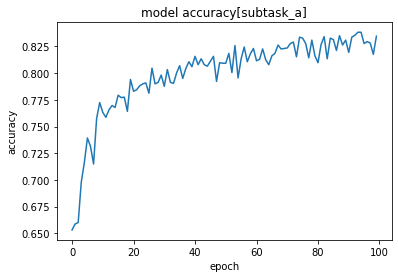

In [ ]:
from matplotlib import pyplot as plt

plt.plot(history.history['accuracy'])
plt.title('model accuracy[subtask_a]')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

In [ ]:
#test_df = pd.read_csv('/content/drive/MyDrive/MINI PROJECT/marathi_test_without_labels.csv')
test_df=test
test_df

,id,tweet,subtask_a,subtask_b,subtask_c
429,429,भारतात तर जगभरात हेल्थकेअर वर्कर्सचा संसर्ग ...,0,NOT,NOT
2781,2781,मग देशाला पण चौकीदार नकोय चांगला पंतप्रधान हवा...,0,NOT,NOT
945,945,च्यायला महिने आधी हेच भिकारचोट केंद्राकडे पैसे...,0,NOT,NOT
2147,2147,नीच आहेत ते दळभद्री,1,UNT,NOT
688,688,तुम्ही बहुतेक चुकून मोदींच्या ऐवजी उद्धव ठाकरे...,0,NOT,NOT
...,...,...,...,...,...
2835,2835,USER USER USER USER USER खंर आहे सरतुम्ही साहे...,0,NOT,NOT
2598,2598,USER काका येवल्यात अजून पाऊस पण नाही झालाय चां...,0,NOT,NOT
667,667,माझ्या छातीमध्ये आता येत नाही कळ गरीबांचा तांद...,0,NOT,NOT
2354,2354,USER तुमच्या पक्षाचे काय झाले ते बघा आधी मंद,1,TIN,GRP


In [ ]:
#replacing " ' " with an emptyspace
test_df['tweet'] = [re.sub("'",'',str(x)) for x in test_df['tweet']]

#removing the punctuations
def remove_punc(text_list):
  table = str.maketrans('', '', string.punctuation)
  removed_punc_text = []
  for sent in text_list:
    sentance = [w.translate(table) for w in sent.split(' ')]
    removed_punc_text.append(' '.join(sentance))
  return removed_punc_text

test_df['tweet'] = remove_punc(test_df['tweet'])

# removing the digits 
test_df['tweet'] = [re.sub("[२३०८१५७९४६]","",x) for x in test_df['tweet']]
#removing emojis from the sentence
test_df['tweet'] = [re.sub("[\u200d]","",x) for x in test_df['tweet']]


# removing the starting and ending whitespaces
test_df['tweet'] = [x.strip() for x in test_df['tweet']]

In [ ]:
test_df

,id,tweet,subtask_a,subtask_b,subtask_c
429,429,भारतात तर जगभरात हेल्थकेअर वर्कर्सचा संसर्ग ...,0,NOT,NOT
2781,2781,मग देशाला पण चौकीदार नकोय चांगला पंतप्रधान हवा...,0,NOT,NOT
945,945,च्यायला महिने आधी हेच भिकारचोट केंद्राकडे पैसे...,0,NOT,NOT
2147,2147,नीच आहेत ते दळभद्री,1,UNT,NOT
688,688,तुम्ही बहुतेक चुकून मोदींच्या ऐवजी उद्धव ठाकरे...,0,NOT,NOT
...,...,...,...,...,...
2835,2835,USER USER USER USER USER खंर आहे सरतुम्ही साहे...,0,NOT,NOT
2598,2598,USER काका येवल्यात अजून पाऊस पण नाही झालाय चां...,0,NOT,NOT
667,667,माझ्या छातीमध्ये आता येत नाही कळ गरीबांचा तांद...,0,NOT,NOT
2354,2354,USER तुमच्या पक्षाचे काय झाले ते बघा आधी मंद,1,TIN,GRP


In [ ]:
def embed_text(text):
  a=[]
  encoded_input = tokenizers(text, return_tensors='pt')
  output = models(**encoded_input)
  a.append(output.last_hidden_state[0][0].detach().numpy())
  a=np.asarray(a)
  b=a.reshape(a.shape[0],-1,a.shape[1])
  return b


In [ ]:
#a=embed_text(test_df['tweet'][0])

In [ ]:
#a.shape

In [ ]:
#output=np.argmax(model.predict(a))

In [ ]:
a1=embed_text('USER तुमच्या पक्षाचे काय झाले ते बघा आधी मंद')
out=np.argmax(model.predict(a1))

1/1 [==============================] - 1s 1s/step


In [ ]:
out

1

In [ ]:
rand_list=[]
for i in test_df['tweet']:
  embeded_tweet=embed_text(i)
  rand_list.append(np.argmax(model.predict(embeded_tweet)))

test_df['predicted_output']=rand_list

In [ ]:
test_df

,id,tweet,subtask_a,subtask_b,subtask_c,predicted_output
429,429,भारतात तर जगभरात हेल्थकेअर वर्कर्सचा संसर्ग ...,0,NOT,NOT,0
2781,2781,मग देशाला पण चौकीदार नकोय चांगला पंतप्रधान हवा...,0,NOT,NOT,1
945,945,च्यायला महिने आधी हेच भिकारचोट केंद्राकडे पैसे...,0,NOT,NOT,1
2147,2147,नीच आहेत ते दळभद्री,1,UNT,NOT,1
688,688,तुम्ही बहुतेक चुकून मोदींच्या ऐवजी उद्धव ठाकरे...,0,NOT,NOT,1
...,...,...,...,...,...,...
2835,2835,USER USER USER USER USER खंर आहे सरतुम्ही साहे...,0,NOT,NOT,0
2598,2598,USER काका येवल्यात अजून पाऊस पण नाही झालाय चां...,0,NOT,NOT,0
667,667,माझ्या छातीमध्ये आता येत नाही कळ गरीबांचा तांद...,0,NOT,NOT,0
2354,2354,USER तुमच्या पक्षाचे काय झाले ते बघा आधी मंद,1,TIN,GRP,1


In [ ]:
ypred=np.asarray(list(test_df['predicted_output']))
ytrue=np.asarray(ytrue)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(ytrue,ypred))

              precision    recall  f1-score   support

           0       0.76      0.83      0.80       295
           1       0.66      0.55      0.60       170

    accuracy                           0.73       465
   macro avg       0.71      0.69      0.70       465
weighted avg       0.72      0.73      0.73       465



In [ ]:
print(confusion_matrix(ytrue, ypred))

[[246  49]
 [ 76  94]]


In [ ]:
import joblib

# Saving the model 
model_json = model.to_json()
with open("final_subtaskA.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("final_subtaskA.h5")

In [ ]:
test_data = pd.read_csv('/content/drive/MyDrive/MINI PROJECT/marathi_test_without_labels.csv')
test_data

,id,tweet
0,0,पूर्व लडाखमधील मुखपरी येथे प्रत्यक्ष ताबारेषेज...
1,1,कोणत्याही रिलेशनशिप मध्ये सुंदर दिसणं खूप महत...
2,2,भारत ऑगस्ट ला स्वतंत्र झाला आणि त्यानंतर तब्...
3,3,स्वत ला हवा तसा बाइट किंवा प्रतिक्रिया घेण्यास...
4,4,व्या नंबरची अर्थव्यवस्था आहे भारताची जगात पर्...
...,...,...
505,505,चायला हा मराठीत कधी पासून ट्विट करायला लागला ...
506,506,मदत तातडीने द्यायला हवी महिने अधिकारी गोट्या ...
507,507,@USER @USER @USER @USER @USER रंगा बिल्ला ने श...
508,508,@USER काही लोकं अजूनही म्हणतात की पूर आल्यावर ...


In [ ]:
#replacing " ' " with an emptyspace
test_data['tweet'] = [re.sub("'",'',str(x)) for x in test_data['tweet']]

#removing the punctuations
def remove_punc(text_list):
  table = str.maketrans('', '', string.punctuation)
  removed_punc_text = []
  for sent in text_list:
    sentance = [w.translate(table) for w in sent.split(' ')]
    removed_punc_text.append(' '.join(sentance))
  return removed_punc_text

test_data['tweet'] = remove_punc(test_data['tweet'])

# removing the digits 
test_data['tweet'] = [re.sub("[२३०८१५७९४६]","",x) for x in test_data['tweet']]
#removing emojis from the sentence
test_data['tweet'] = [re.sub("[\u200d]","",x) for x in test_data['tweet']]


# removing the starting and ending whitespaces
test_data['tweet'] = [x.strip() for x in test_data['tweet']]

In [ ]:
rand_list=[]
for i in test_data['tweet']:
  embeded_tweet=embed_text(i)
  rand_list.append(np.argmax(model.predict(embeded_tweet)))

test_data['predicted_output']=rand_list

1/1 [==============================] - 0s 19ms/step


In [ ]:
test_data

,id,tweet,predicted_output
0,0,पूर्व लडाखमधील मुखपरी येथे प्रत्यक्ष ताबारेषेज...,1
1,1,कोणत्याही रिलेशनशिप मध्ये सुंदर दिसणं खूप महत...,0
2,2,भारत ऑगस्ट ला स्वतंत्र झाला आणि त्यानंतर तब्...,0
3,3,स्वत ला हवा तसा बाइट किंवा प्रतिक्रिया घेण्यास...,0
4,4,व्या नंबरची अर्थव्यवस्था आहे भारताची जगात पर्...,0
...,...,...,...
505,505,चायला हा मराठीत कधी पासून ट्विट करायला लागला ...,0
506,506,मदत तातडीने द्यायला हवी महिने अधिकारी गोट्या ...,1
507,507,USER USER USER USER USER रंगा बिल्ला ने शिवसेन...,1
508,508,USER काही लोकं अजूनही म्हणतात की पूर आल्यावर क...,1


In [ ]:
test_data['tweet'][508]

'USER काही लोकं अजूनही म्हणतात की पूर आल्यावर केंद्राने मदत करावी हेच समजत नाही की मग राज्य सरकार गोट्या खेळाय…'

In [ ]:
test_data['tweet'][4]

'व्या नंबरची अर्थव्यवस्था आहे भारताची जगात  पर्यंत चंप्या आता पण  वर आहे अण…'